## 3. Genere un data set propio de al menos cinco categorías de señales de sonido o audio y entrene un modelo neuronal profundo usando convolución 2D y como entrada el espectrograma de la señal a trabajar. Pruebe a lo menos dos posibles modelos y presente el diagrama del de mejor desempeño, además de calcular la cantidad de parámetros del mismo en cada una de sus capas. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Se cargan las diferentes dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import tensorflow.keras.optimizers as SGD

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, Flatten, MaxPooling1D, MaxPooling2D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython import display


In [ ]:
!pip install pydub


In [ ]:
# Ejemplo de carga de un archivo
from os import path
from pydub import AudioSegment

path="/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/"
wolf_file=path+"Lobos.mp3"
Hen_file=path+"gallina.mp3"
whale_file=path+"ballena.mp3"
hippo_file=path+"hippo.mp3"
eagle_file=path+"eagle.mp3"
buffalo_file=path+"buffalo.mp3"
test_file=path+"jungle_test.mp3"

#conver to wav files
dest1=path+"wolf.wav"
sound1 = AudioSegment.from_mp3(wolf_file)
sound1.export(dest1, format="wav")

dest2=path+"gallina.wav"
sound2 = AudioSegment.from_mp3(Hen_file)
sound2.export(dest2, format="wav")

dest3=path+"ballena.wav"
sound3 = AudioSegment.from_mp3(whale_file)
sound3.export(dest3, format="wav")

dest4=path+"hippo.wav"
sound4 = AudioSegment.from_mp3(hippo_file)
sound4.export(dest4, format="wav")

dest5=path+"eagle.wav"
sound5 = AudioSegment.from_mp3(eagle_file)
sound5.export(dest5, format="wav")

dest6=path+"buffalo.wav"
sound6 = AudioSegment.from_mp3(buffalo_file)
sound6.export(dest6, format="wav")

dest_test=path+"test.wav"
sound_test = AudioSegment.from_mp3(test_file)
sound_test.export(dest_test, format="wav")


<_io.BufferedRandom name='/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/test.wav'>

In [ ]:
!pip install tensorflow.io

     |████████████████████████████████| 23.4 MB 75.2 MB/s 


In [ ]:
import tensorflow_io as tfio
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=8000)
    return wav

/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/hippo.wav
(477959,)


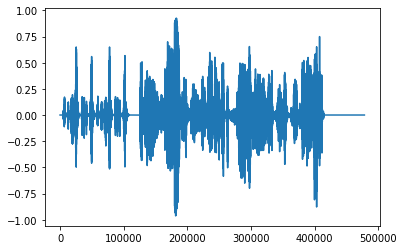

In [ ]:
print(dest4)
wave = load_wav_16k_mono(dest4)
print(wave.shape)
plt.plot(wave)
plt.show()

/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/eagle.wav
(304088,)


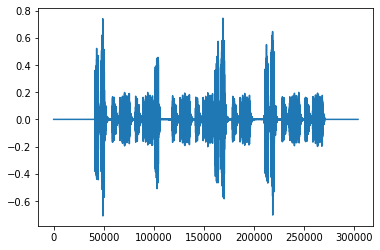

In [ ]:
print(dest5)
wave5 = load_wav_16k_mono(dest5)
print(wave5.shape)
plt.plot(wave5)
plt.show()

In [ ]:
def preprocess(wave): 
    #wav = wave[:30000]
    #zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    #wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wave, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram

In [ ]:
espectrograma= preprocess(wave5)
print('Waveform shape:', wave5.shape)
print('Spectrogram shape:', espectrograma.shape)
print('Audio playback')
display.display(display.Audio(wave5, rate=6000))


Waveform shape: (304088,)
Spectrogram shape: (2374, 129)
Audio playback


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


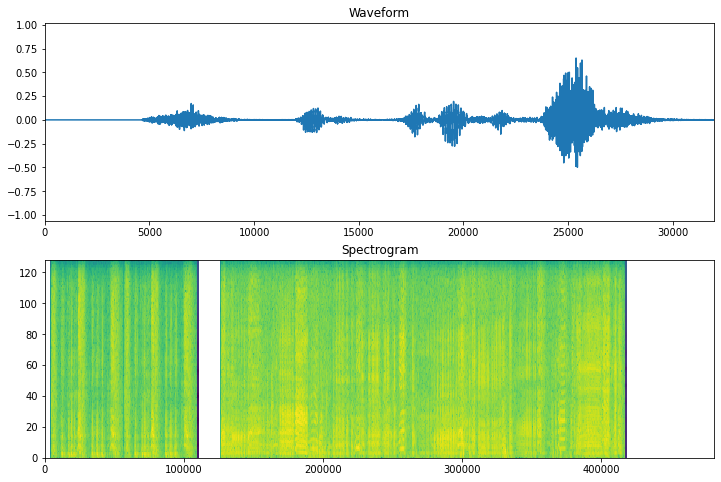

In [ ]:
def plot_spectrogram(espectrograma, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
  log_spec = np.log(espectrograma.T)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(espectrograma), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(wave.shape[0])
axes[0].plot(timescale, wave.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 32000])
plot_spectrogram(espectrograma.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [ ]:
# Load  dataset
wave = dict()
RutaFile="/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/wolf.wav"
wave[0] = load_wav_16k_mono(RutaFile)
#espec_wolf= preprocess(wave1)

RutaFile="/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/gallina.wav"
wave[1]  = load_wav_16k_mono(RutaFile)
#espec_hen= preprocess(wave2)

RutaFile="/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/ballena.wav"
wave[2] = load_wav_16k_mono(RutaFile)
#espec_whale= preprocess(wave3)

RutaFile="/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/hippo.wav"
wave[3]  = load_wav_16k_mono(RutaFile)
#espec_hippo= preprocess(wave4)

RutaFile="/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/eagle.wav"
wave[4]  = load_wav_16k_mono(RutaFile)
#espec_eagle= preprocess(wave5)

RutaFile="/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/buffalo.wav"
wave[5]  = load_wav_16k_mono(RutaFile)
#espec_buffalo= preprocess(wave6)

print(wave[0][0:30000])

tf.Tensor(
[ 0.          0.          0.         ... -0.19307002 -0.1891907
 -0.18400112], shape=(30000,), dtype=float32)


In [ ]:
Datos=np.zeros((60,233,129))

#ciclo para crear el xtrain toma 30.000 datos por cada archivo
for j in range(6):
  for i in range(10):
    Datos[j]=preprocess(wave[j][i*30000:(i+1)*30000])

print(Datos.shape)

(60, 233, 129)


In [ ]:
YtrainIni=np.zeros((60,1))
for i in range(6):
    YtrainIni[i*10:(i+1)*10]=i
print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]]


In [ ]:
Ytrain= to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Datos, Ytrain, test_size=0.33, random_state=42, stratify=Ytrain)

In [ ]:
X_train.shape
print(X_train[39])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
inputs = keras.layers.Input(shape=(233, 129, 1))
conv1 = keras.layers.Conv2D(8, (3,3),padding='valid',activation='relu')(inputs)
pool1 = keras.layers.MaxPool2D((2,2),(2,2))(conv1)
conv2 = keras.layers.Conv2D(16,(3,3), padding='valid',activation='relu')(pool1)
pool2 = keras.layers.MaxPool2D((2,2),(2,2))(conv2)
flat = keras.layers.Flatten()(pool2)
FC1 = keras.layers.Dense(120,activation='relu')(flat)
FC2 =keras.layers.Dense(84,activation='relu')(FC1)
outputs = keras.layers.Dense(6,activation='softmax')(FC2)
modelo = keras.models.Model(inputs, outputs)
modelo.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 233, 129, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 231, 127, 8)       80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 115, 63, 8)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 113, 61, 16)       1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 30, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 26880)             0   

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_modelo = modelo.fit(X_train,y_train, epochs=100,batch_size=None)

Epoch 1/100
2/2 [==============================] - 3s 339ms/step - loss: 1.7718 - accuracy: 0.1000
Epoch 2/100
2/2 [==============================] - 1s 298ms/step - loss: 1.6363 - accuracy: 0.1750
Epoch 3/100
2/2 [==============================] - 1s 287ms/step - loss: 1.6319 - accuracy: 0.1750
Epoch 4/100
2/2 [==============================] - 1s 301ms/step - loss: 1.6174 - accuracy: 0.1750
Epoch 5/100
2/2 [==============================] - 1s 433ms/step - loss: 1.6118 - accuracy: 0.3000
Epoch 6/100
2/2 [==============================] - 1s 326ms/step - loss: 1.6101 - accuracy: 0.3000
Epoch 7/100
2/2 [==============================] - 1s 337ms/step - loss: 1.6087 - accuracy: 0.3000
Epoch 8/100
2/2 [==============================] - 1s 348ms/step - loss: 1.6075 - accuracy: 0.3000
Epoch 9/100
2/2 [==============================] - 2s 333ms/step - loss: 1.6066 - accuracy: 0.3000
Epoch 10/100
2/2 [==============================] - 1s 341ms/step - loss: 1.6051 - accuracy: 0.3000
Epoch 11/

2/2 [==============================] - 0s 61ms/step - loss: 1.5184 - accuracy: 0.3000


[1.5183709859848022, 0.30000001192092896]

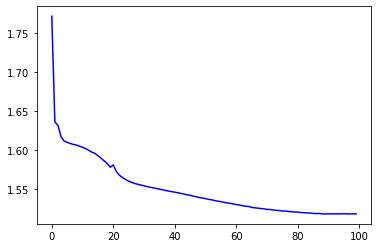

In [ ]:
plt.plot(history_modelo.history["loss"],'b')
modelo.evaluate(X_train, y_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 231, 127, 1)       10        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 116, 64, 1)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7424)              0         
                                                                 
 dense_3 (Dense)             (None, 6)                 44550     
                                                                 
Total params: 44,560
Trainable params: 44,560
Non-trainable params: 0
_________________________________________________________________


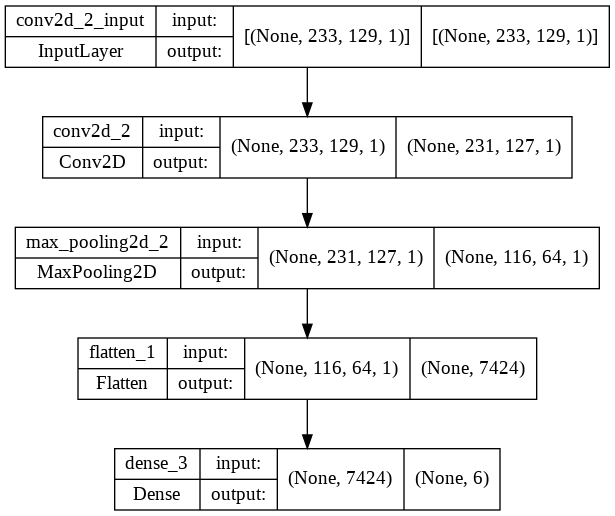

In [ ]:
#Definición del modelo 2
model = keras.models.Sequential()
model.add(Conv2D(1, (3,3), input_shape=(233, 129, 1)))
model.add(MaxPooling2D(pool_size=2,strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(6, activation = 'softmax'))
model.summary()
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=100,batch_size=None)

Epoch 1/100
2/2 [==============================] - 1s 50ms/step - loss: 1.7882 - accuracy: 0.1250
Epoch 2/100
2/2 [==============================] - 0s 60ms/step - loss: 1.6661 - accuracy: 0.3000
Epoch 3/100
2/2 [==============================] - 0s 49ms/step - loss: 1.6469 - accuracy: 0.2750
Epoch 4/100
2/2 [==============================] - 0s 63ms/step - loss: 1.6407 - accuracy: 0.2750
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 1.6330 - accuracy: 0.2750
Epoch 6/100
2/2 [==============================] - 0s 58ms/step - loss: 1.6254 - accuracy: 0.2750
Epoch 7/100
2/2 [==============================] - 0s 55ms/step - loss: 1.6200 - accuracy: 0.2750
Epoch 8/100
2/2 [==============================] - 0s 54ms/step - loss: 1.6173 - accuracy: 0.3000
Epoch 9/100
2/2 [==============================] - 0s 49ms/step - loss: 1.6191 - accuracy: 0.2750
Epoch 10/100
2/2 [==============================] - 0s 47ms/step - loss: 1.6237 - accuracy: 0.2750
Epoch 11/100
2/2 [=

2/2 [==============================] - 0s 31ms/step - loss: 1.5644 - accuracy: 0.2750


[1.5644029378890991, 0.2750000059604645]

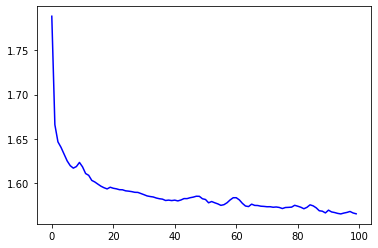

In [ ]:
plt.plot(history.history["loss"],'b')
model.evaluate(X_train, y_train)

In [ ]:
display.display(display.Audio(X_train[10], rate=6000))

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:135: RuntimeWarning: invalid value encountered in true_divide
  scaled = np.int16(data/np.max(np.abs(data))*32767).tolist()


In [ ]:
# Load  dataset
# Aqui se cargan los datos de Validación
RutaFile="/content/gdrive/MyDrive/DeepLearning/reconocimiento Sonido/test.wav"
wave_test = load_wav_16k_mono(RutaFile)
wave_test.shape

TensorShape([917838])

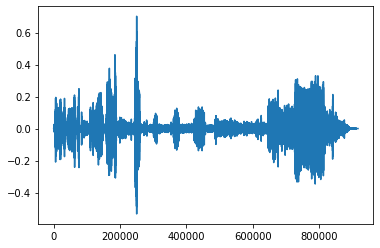

In [ ]:

plt.plot(wave_test)
plt.show()

In [ ]:
DatosTest=np.zeros((10,233,129))
for i in range(10):
    DatosTest[i]=preprocess(wave_test[i*30000:(i+1)*30000])

#espec_test= preprocess(wave_test)
#DatosTest[0,:,:]=espec_test
XVal=tf.expand_dims(DatosTest, axis=3)
print(XVal.shape)

(10, 233, 129, 1)


In [ ]:
YtestIni=np.zeros((10,1))
for i in range(1):
    YtestIni[i*10:(i+1)*10]=4
print(YtestIni)

[[4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]


In [ ]:
YVal3 = np.zeros((10,6))
YVal3 [:,4:5] = np.ones((10,1))
print(YVal3)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [ ]:
model.evaluate(XVal,YVal3)

1/1 [==============================] - 0s 185ms/step - loss: 12.4656 - accuracy: 0.0000e+00


[12.465631484985352, 0.0]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00      10.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0

[[ 0  0]
 [10  0]]


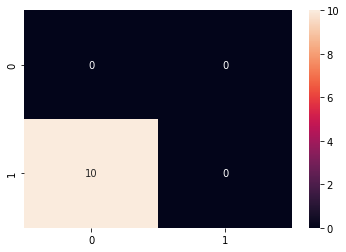

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=model.predict(XVal)

y_test_class = np.argmax(YVal3,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00      10.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0

[[ 0  0]
 [10  0]]


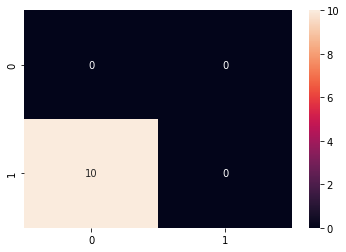

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal3,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [ ]:
model.evaluate(XVal,YVal3)

1/1 [==============================] - 0s 126ms/step - loss: 12.4656 - accuracy: 0.0000e+00


[12.465631484985352, 0.0]